In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [69]:
df = pd.read_excel('19_35000.xlsx')
df['SMILES'] = df['SMILES'].apply(lambda x: x.upper())
df = df.drop(['Unnamed: 0', 'Title'], axis = 1)
df = df.drop_duplicates()
df

,IC50,SMILES
0,0.000015,[H]\N=C(N)\N[C@@H](C1)[C@@H](NC(=O)C)[C@@H](C=...
1,0.000016,O=C(O)C1=C[C@H](N)[C@@H](NC(=O)C)[C@@H](C1)COC...
2,0.000033,C=CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O...
3,0.000032,CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O)O...
4,0.000041,O=C(O)C1C(O)C(=O)CC([NH]1)-C(C2C)CCC(C2)-C3NOC...
...,...,...
36372,2366.790000,CC(=O)N[C@H]1CC[C@@H]([C@@H]12)[C@@H](O[SI](C)...
36373,2372.100000,CC(=O)NC(CC1)C(OC(=O)C)CC1C(=O)O
36374,2600.970000,C1CCCC(C12)CCCC2CNC(=O)CCCCCCO[C@]3(C(=O)O)C[C...
36375,2793.000000,NCCCC(=O)NC(C(CC1)NC(=O)C)CC1C(=O)O


# Повторяющиеся строки (одинаковые SMILES) с разным IC50

In [70]:
t = df.groupby('SMILES', as_index = False).count().sort_values(by = 'IC50', ascending = False)
stds = []
ic50, smiles = [], []
for i in t[t['IC50'] > 1]['SMILES']:
    stds += [round(df[df['SMILES'] == i]['IC50'].std(), 3)]
    print(df[df['SMILES'] == i]['IC50'].tolist(), round(df[df['SMILES'] == i]['IC50'].median(), 3), round(df[df['SMILES'] == i]['IC50'].std(), 3))
    if round(df[df['SMILES'] == i]['IC50'].std(), 3) < 20:
        smiles += [i]
        ic50 += [df[df['SMILES'] == i]['IC50'].median()]

df = df.merge(t[t['IC50'] == 1]['SMILES'], on = 'SMILES')
df = pd.concat((df, pd.DataFrame({'IC50': ic50, 'SMILES': smiles})))

[0.1, 0.9, 1.0, 13.5] 0.95 6.429
[5.1, 15.3, 113.0] 15.3 59.57
[0.007, 0.015, 0.107] 0.015 0.056
[2.84e-05, 0.1, 36.253] 0.1 20.902
[1.4, 3.7, 100.0] 3.7 56.275
[8.3, 9.8, 11.7] 9.8 1.704
[0.1, 1.491, 9.7] 1.491 5.188
[17.4, 79.4, 300.0] 79.4 148.532
[15.4, 16.3, 25.8] 16.3 5.762
[300.0, 1000.0] 650.0 494.975
[6.7, 300.0] 153.35 207.394
[0.000907382, 48.9] 24.45 34.577
[3.0, 175.0] 89.0 121.622
[0.205, 1.0] 0.602 0.562
[0.679, 2.985] 1.832 1.631
[2.084, 2.963] 2.524 0.622
[2.3, 3.6] 2.95 0.919
[4.381, 5.395] 4.888 0.717
[4.159, 5.332] 4.746 0.829
[20.0, 24.0] 22.0 2.828
[13.1, 26.3] 19.7 9.334
[3.618, 4.009] 3.814 0.276
[3.674, 4.604] 4.139 0.658
[2.613, 2.673] 2.643 0.042
[1.236, 2.521] 1.878 0.909
[2.436, 2.49] 2.463 0.038
[2.4, 5.8] 4.1 2.404
[0.71, 2.703] 1.706 1.409
[17.2, 39.4] 28.3 15.698
[5.0, 335.0] 170.0 233.345
[0.000742266, 0.00059668] 0.001 0.0
[2.633, 3.382] 3.008 0.53
[10.6, 26.6] 18.6 11.314
[3.3, 15.0] 9.15 8.273
[1.972, 5.609] 3.79 2.572
[0.382, 19.168] 9.775 13.284
[

In [76]:
df

,IC50,SMILES
0,0.000015,[H]\N=C(N)\N[C@@H](C1)[C@@H](NC(=O)C)[C@@H](C=...
1,0.000016,O=C(O)C1=C[C@H](N)[C@@H](NC(=O)C)[C@@H](C1)COC...
2,0.000033,C=CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O...
3,0.000032,CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O)O...
4,0.000041,O=C(O)C1C(O)C(=O)CC([NH]1)-C(C2C)CCC(C2)-C3NOC...
...,...,...
90,6.194000,C1CCCC(C1C(=O)O)NC(=O)C2CC(C(C)CC2)S(=O)(=O)NC...
91,300.150000,COC(=O)CN1CCOCC1
92,0.000069,[H]/N=C(N)\N[C@@H](C1)[C@@H](NC(=O)C)[C@@H](C=...
93,3.505500,C1CCCC(C12)CCC(C2)C(=O)COC(=O)C3CNCCN3


In [72]:
pd.Series(stds).describe()

count    126.000000
mean      29.812365
std       70.507363
min        0.000000
25%        0.547750
50%        2.629500
75%       19.604250
max      494.975000
dtype: float64

# Распределение стандартных отклонений величины IC50 у строк, которые повторяются

<Axes: >

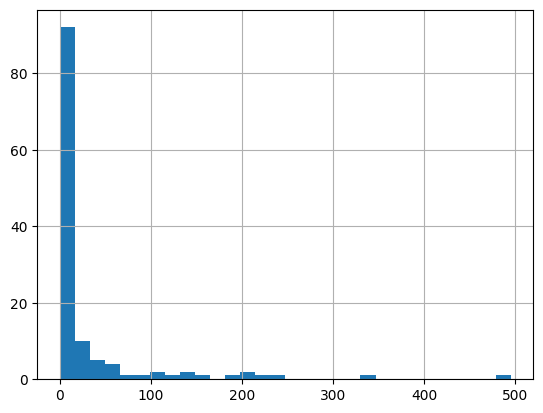

In [73]:
pd.Series(stds).hist(bins = 30)

------

In [77]:
df.describe()

,IC50
count,36186.000000
mean,7.556724
std,47.728133
min,0.000010
25%,1.698000
50%,3.634000
75%,5.914750
max,3183.600000


----------

# Распределение IC50

<Axes: >

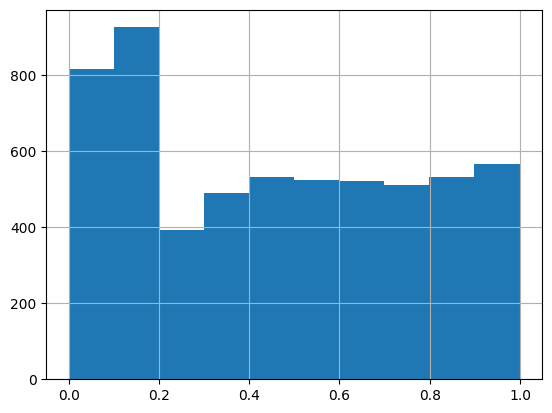

In [78]:
df[df['IC50'] < 1]['IC50'].hist()

<Axes: >

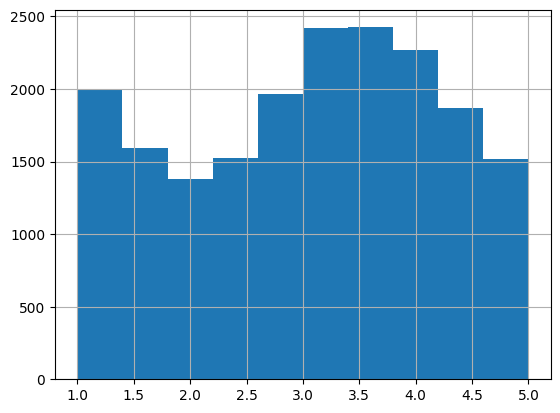

In [79]:
df.loc[(df['IC50'] < 5) & (df['IC50'] >= 1)]['IC50'].hist()

<Axes: >

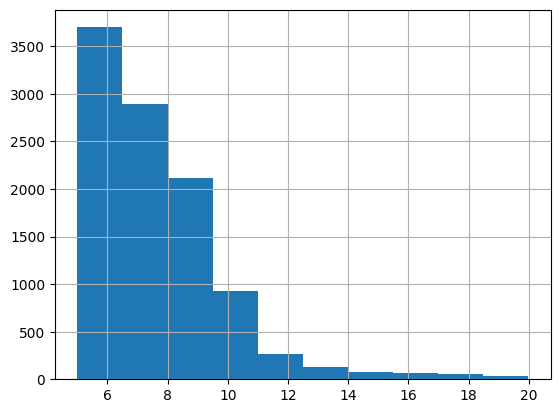

In [80]:
df.loc[(df['IC50'] >= 5) & (df['IC50'] < 20)]['IC50'].hist()

<Axes: >

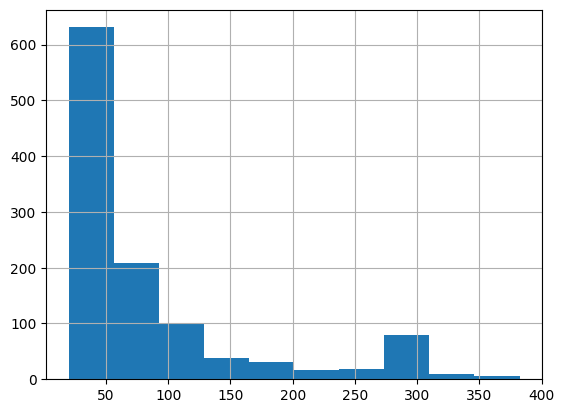

In [81]:
df.loc[(df['IC50'] >= 20) & (df['IC50'] < 400)]['IC50'].hist()

<Axes: >

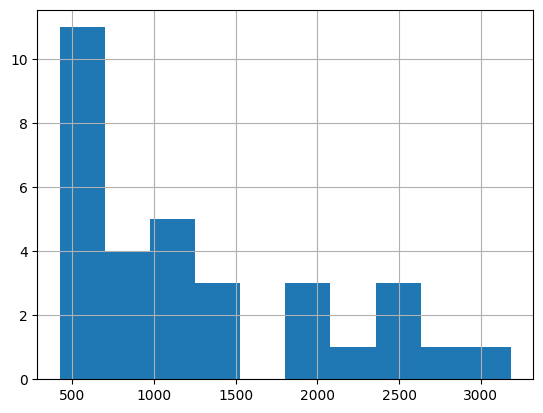

In [82]:
df.loc[(df['IC50'] >= 400)]['IC50'].hist()

-----

# Длина химической формулы

In [83]:
df['length'] = df['SMILES'].apply(lambda x: len(x))
df

,IC50,SMILES,length
0,0.000015,[H]\N=C(N)\N[C@@H](C1)[C@@H](NC(=O)C)[C@@H](C=...,66
1,0.000016,O=C(O)C1=C[C@H](N)[C@@H](NC(=O)C)[C@@H](C1)COC...,52
2,0.000033,C=CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O...,55
3,0.000032,CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O)O...,53
4,0.000041,O=C(O)C1C(O)C(=O)CC([NH]1)-C(C2C)CCC(C2)-C3NOC...,55
...,...,...,...
90,6.194000,C1CCCC(C1C(=O)O)NC(=O)C2CC(C(C)CC2)S(=O)(=O)NC...,53
91,300.150000,COC(=O)CN1CCOCC1,16
92,0.000069,[H]/N=C(N)\N[C@@H](C1)[C@@H](NC(=O)C)[C@@H](C=...,63
93,3.505500,C1CCCC(C12)CCC(C2)C(=O)COC(=O)C3CNCCN3,38


<Axes: >

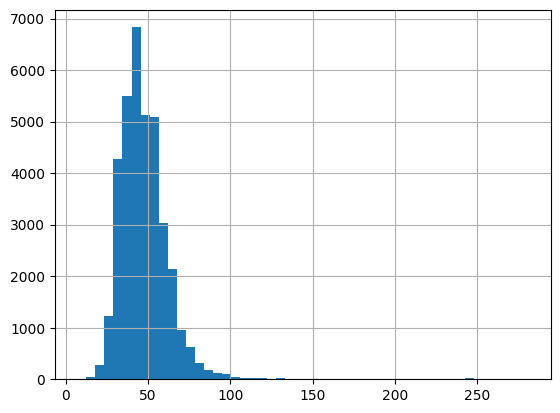

In [84]:
df['length'].hist(bins = 50)

<Axes: >

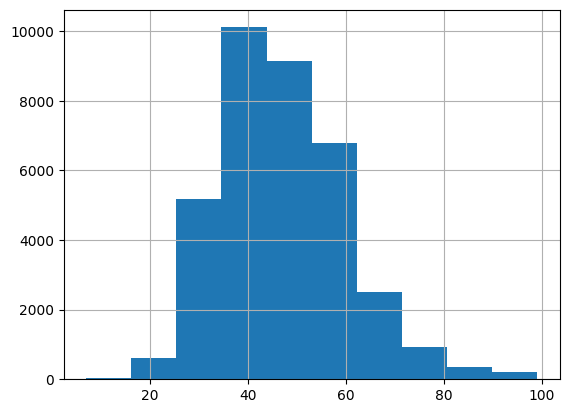

In [85]:
df.loc[df['length'] < 100]['length'].hist()

<Axes: >

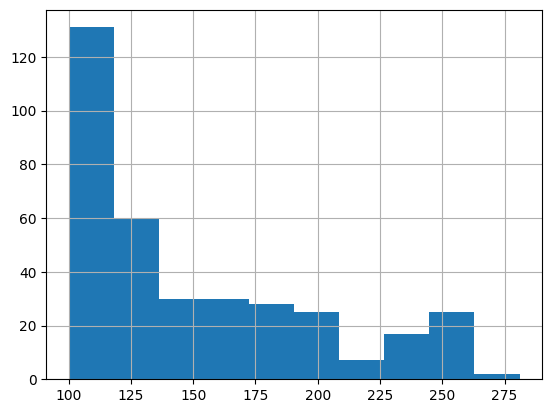

In [86]:
df.loc[df['length'] >= 100]['length'].hist()

# Зависимость IC50 от длины SMILES

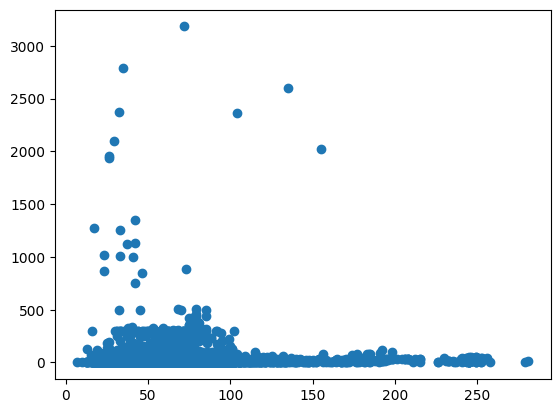

In [87]:
plt.scatter(df['length'], df['IC50'])

------

# Какие символы наиболее часто встречаются в формулах

In [88]:
chr = {}
for i in df['SMILES'].values:
    for j in i:
        if j in chr:
            chr[j] += 1
        else:
            chr[j] = 1

sorted(chr.items(), key = lambda x: x[1])

[('Z', 1),
 ('A', 1),
 ('E', 3),
 ('I', 40),
 ('.', 64),
 ('9', 84),
 ('P', 116),
 ('8', 208),
 ('7', 450),
 ('6', 1564),
 ('#', 1802),
 ('R', 2129),
 ('B', 2147),
 ('+', 2319),
 ('/', 6303),
 ('\\', 7081),
 ('5', 7538),
 ('F', 7651),
 ('L', 7654),
 ('-', 11424),
 ('S', 19134),
 ('H', 21727),
 ('4', 25086),
 ('[', 28926),
 (']', 28926),
 ('@', 31825),
 ('3', 52821),
 ('=', 67617),
 ('2', 69525),
 ('1', 72286),
 ('N', 99511),
 ('O', 102902),
 ('(', 186684),
 (')', 186684),
 ('C', 678758)]

In [94]:
df['C_cnt'] = df['SMILES'].apply(lambda x: x.count('C'))
df['O_cnt'] = df['SMILES'].apply(lambda x: x.count('O'))
df['(_cnt'] = df['SMILES'].apply(lambda x: x.count('('))
df['=_cnt'] = df['SMILES'].apply(lambda x: x.count('='))
df['N_cnt'] = df['SMILES'].apply(lambda x: x.count('N'))

------

# Зависимость таргета от содержания формулы

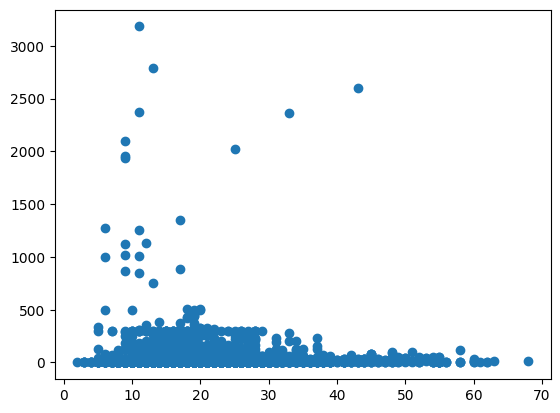

In [95]:
plt.scatter(df['C_cnt'], df['IC50'])

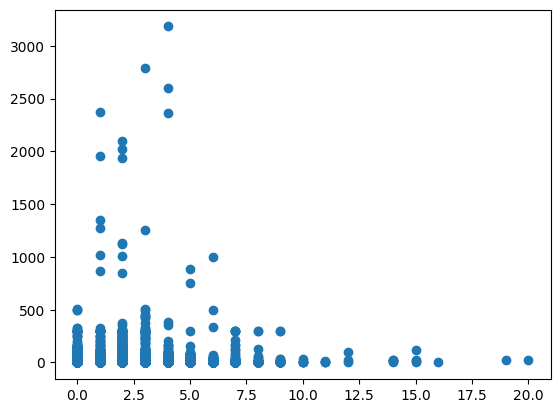

In [96]:
plt.scatter(df['N_cnt'], df['IC50'])

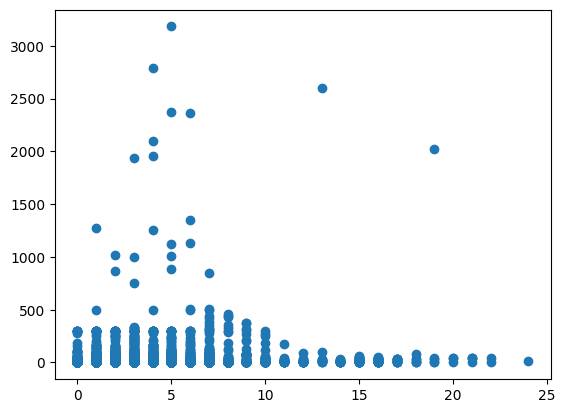

In [97]:
plt.scatter(df['O_cnt'], df['IC50'])

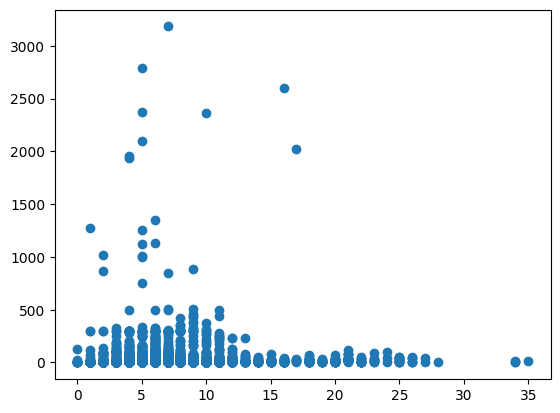

In [98]:
plt.scatter(df['(_cnt'], df['IC50'])

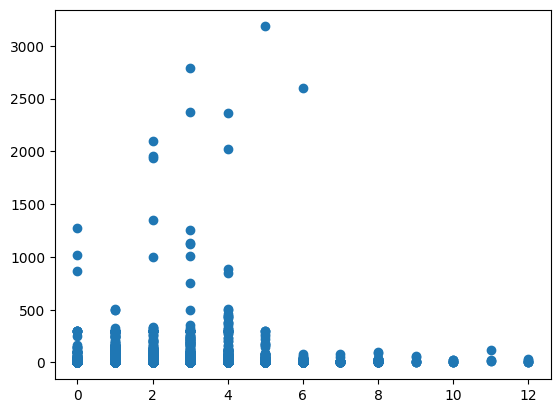

In [99]:
plt.scatter(df['=_cnt'], df['IC50'])

-------